In [18]:
import pandas as pd

df = pd.read_csv('RELIANCE.NS.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-08-19,407.636017,413.084381,399.983551,406.273926,382.659485,7453286.0
1,2013-08-20,401.741882,411.499390,398.745300,408.799988,385.038788,5269817.0
2,2013-08-21,412.589081,413.431091,386.436951,388.121002,365.561737,7250788.0
3,2013-08-22,387.551392,400.528381,383.465118,399.265350,376.058319,10288567.0
4,2013-08-23,403.029694,408.478027,400.454102,405.902435,382.309631,6614304.0
...,...,...,...,...,...,...,...
2464,2023-08-11,2532.449951,2558.850098,2512.350098,2547.149902,2547.149902,11089665.0
2465,2023-08-14,2539.000000,2582.300049,2525.000000,2577.250000,2577.250000,4787906.0
2466,2023-08-16,2551.000000,2582.800049,2551.000000,2575.149902,2575.149902,5101556.0
2467,2023-08-17,2567.100098,2578.100098,2532.850098,2538.000000,2538.000000,6836872.0


In [19]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2013-08-19,406.273926
1,2013-08-20,408.799988
2,2013-08-21,388.121002
3,2013-08-22,399.265350
4,2013-08-23,405.902435
...,...,...
2464,2023-08-11,2547.149902
2465,2023-08-14,2577.250000
2466,2023-08-16,2575.149902
2467,2023-08-17,2538.000000


In [20]:
df['Date']

0       2013-08-19
1       2013-08-20
2       2013-08-21
3       2013-08-22
4       2013-08-23
           ...    
2464    2023-08-11
2465    2023-08-14
2466    2023-08-16
2467    2023-08-17
2468    2023-08-18
Name: Date, Length: 2469, dtype: object

In [21]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-08-16')
datetime_object

datetime.datetime(2023, 8, 16, 0, 0)

In [22]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\prera\AppData\Local\Temp\ipykernel_17736\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2013-08-19
1      2013-08-20
2      2013-08-21
3      2013-08-22
4      2013-08-23
          ...    
2464   2023-08-11
2465   2023-08-14
2466   2023-08-16
2467   2023-08-17
2468   2023-08-18
Name: Date, Length: 2469, dtype: datetime64[ns]

In [23]:
df.index = df.pop('Date')
df

,Close
Date,
2013-08-19,406.273926
2013-08-20,408.799988
2013-08-21,388.121002
2013-08-22,399.265350
2013-08-23,405.902435
...,...
2023-08-11,2547.149902
2023-08-14,2577.250000
2023-08-16,2575.149902


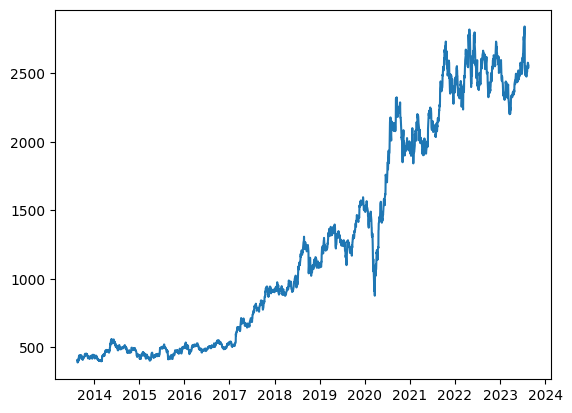

In [24]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [25]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-08-18', 
                                '2023-08-18', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-08-18,2145.649902,2173.500000,2164.250000,2172.649902
1,2021-08-20,2173.500000,2164.250000,2172.649902,2148.250000
2,2021-08-23,2164.250000,2172.649902,2148.250000,2162.350098
3,2021-08-24,2172.649902,2148.250000,2162.350098,2183.699951
4,2021-08-25,2148.250000,2162.350098,2183.699951,2202.600098
...,...,...,...,...,...
492,2023-08-11,2508.649902,2525.199951,2536.449951,2547.149902
493,2023-08-14,2525.199951,2536.449951,2547.149902,2577.250000
494,2023-08-16,2536.449951,2547.149902,2577.250000,2575.149902
495,2023-08-17,2547.149902,2577.250000,2575.149902,2538.000000


In [26]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((497,), (497, 3, 1), (497,))

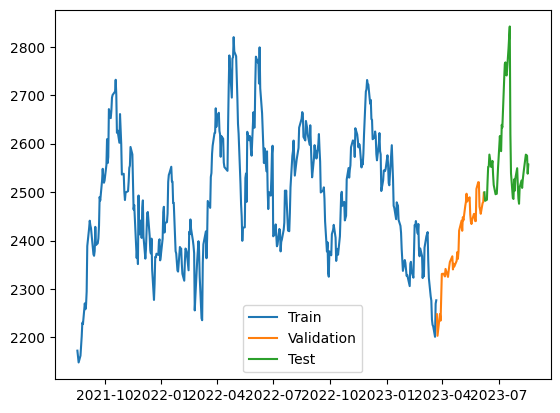

In [27]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
13/13 [==============================] - 5s 82ms/step - loss: 6220399.0000 - mean_absolute_error: 2490.6484 - val_loss: 5773568.0000 - val_mean_absolute_error: 2401.4612
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 6215313.0000 - mean_absolute_error: 2489.6279 - val_loss: 5767598.0000 - val_mean_absolute_error: 2400.2178
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 6208200.5000 - mean_absolute_error: 2488.1997 - val_loss: 5759442.5000 - val_mean_absolute_error: 2398.5181
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 6198510.5000 - mean_absolute_error: 2486.2502 - val_loss: 5748448.0000 - val_mean_absolute_error: 2396.2251
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 6185334.5000 - mean_absolute_error: 2483.5986 - val_loss: 5733283.0000 - val_mean_absolute_error: 2393.0588
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 6167274.5000 - m

13/13 [==============================] - 1s 3ms/step


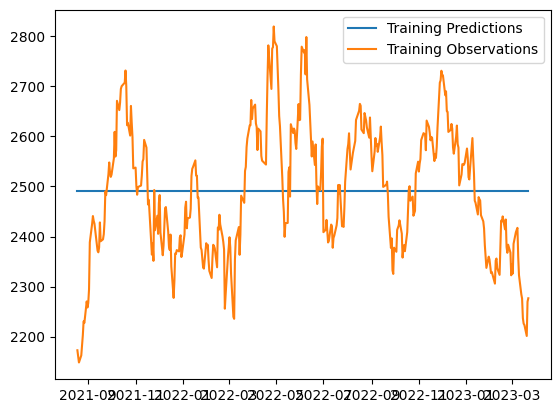

In [29]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 8ms/step


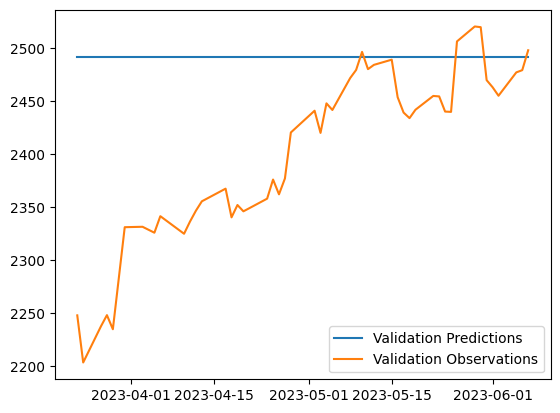

In [30]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 6ms/step


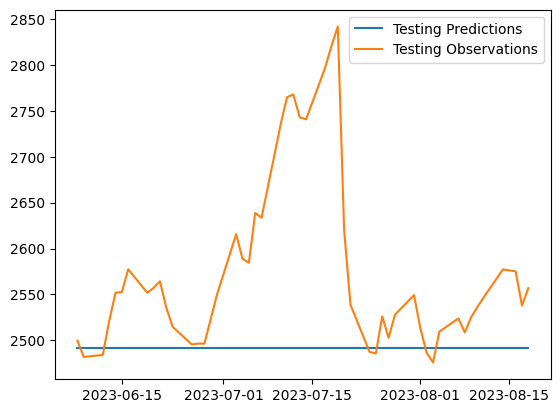

In [31]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [32]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 24ms/step


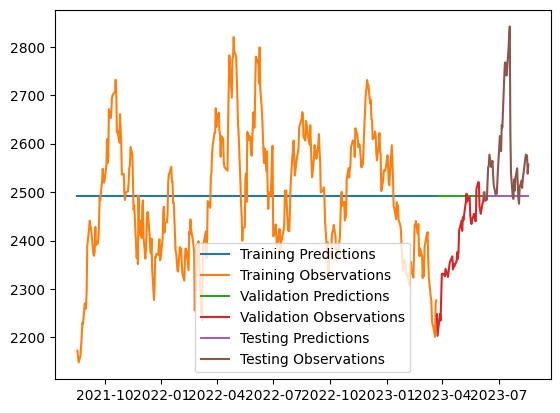

In [33]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

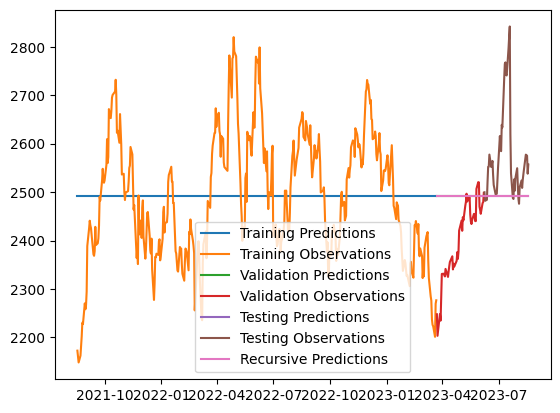

In [34]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])